In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as web
import time
%matplotlib inline

Dollar Rich App investment signals:
https://m.blog.naver.com/PostView.naver?blogId=boot&logNo=222430430028&proxyReferer=

In [2]:
tickers = ["KRW=X","SGD=X","SGDKRW=X","DX-Y.NYB","^KS11"]

# Period specification:
#start = dt.datetime(2017,4,29)
#end = dt.datetime(2022,8,6)

# Tagged to N periods from Now
#end = start + dt.timedelta(weeks=52*5)
end = dt.datetime.now()
N = 5
start = end - dt.timedelta(weeks=52*N)
#start = end - dt.timedelta(days=252*N)

# 'd' = daily, 'w' = weekly, 'm' = monthly
interval = 'd'
frequency = {'d':252, 'w':52, 'm': 12} # frequency of compounding

# Import Stocks Data
def get_data(tickers, start, end, interval,OHLC='Adj Close'):
    df = pd.DataFrame()
    for t in tickers:
        df[t] = web.get_data_yahoo(t, start, end, interval=interval)[OHLC]
    df.dropna(inplace=True)
    
    return df

# Dollar Rich Tracker
def GraphAll(targetcol,target_name,Targetcurrency_col=None,USDidx_col=None):
    today = dt.datetime.now()
    
    # Compute descriptive stats
    targetcol_median52w = targetcol.median()
    targetcol_min52w = targetcol.min()
    targetcol_max52w = targetcol.max()
    targetcol_current = targetcol.iloc[-1]

    # Target Currency Graph
    plt.figure(figsize=(10, 8))
    plt.grid()
    
    if target_name == 'Dollar Gap Valuation': # targetcol = DollarGap
        plt.plot(Targetcurrency_col)
        targetcol_current = Targetcurrency_col.iloc[-1]
        plt.text(Targetcurrency_col.index[-1],targetcol_current,
                 f'{round(targetcol_current,2)}'
                ,fontsize=20)
        
        #plt.legend(['Price','min','median','max'],loc ="center left")
        plt.title(f'{target_name} {N} year(s), date/time: {today}',fontsize=15)
        plt.xlabel('Date',fontsize=15)
        plt.ylabel(f'{target_name}',fontsize=15)
        
        USDidx_current = USDidx_col.iloc[-1]
        DGValuation = (USDidx_current / targetcol_median52w) * 100
        plt.axhline(DGValuation,c="r")
        plt.text(targetcol.index[-1],DGValuation,
                 f'{round(DGValuation,2)}, ({round((targetcol_current/DGValuation-1)*100,2)}% from Optimal DG Value)'
                 ,fontsize=15)
        
        return targetcol_current, DGValuation
        
    else:
        plt.plot(targetcol)
        plt.axhline(targetcol_min52w,c="m")
        plt.axhline(targetcol_median52w,c="r")
        plt.axhline(targetcol_max52w,c="g")
        plt.legend(['Price','min','median','max'],loc ="center left")
        plt.title(f'{target_name} {N} year(s), date/time: {today}',fontsize=15)
        plt.xlabel('Date',fontsize=15)
        plt.ylabel(f'{target_name}',fontsize=15)
        plt.plot(targetcol.index[-1],targetcol_current,'co', markersize = 5, markeredgewidth=3)
        plt.text(targetcol.index[-1],targetcol_current,
                 f'{round(targetcol_current,2)}'
                ,fontsize=20)

        plt.text(targetcol.index[-1],targetcol_median52w,
                 f'{round(targetcol_median52w,2)}, ({round((targetcol_current/targetcol_median52w-1)*100,2)}% from Median)'
                 ,fontsize=15)
        plt.text(targetcol.index[-1],targetcol_min52w,
                 f'{round(targetcol_min52w,2)}, ({round((targetcol_current/targetcol_min52w-1)*100,2)}% from Min)',
                 fontsize=15)
        plt.text(targetcol.index[-1],targetcol_max52w,
                 f'{round(targetcol_max52w,2)}, ({round((targetcol_current/targetcol_max52w-1)*100,2)}% from Max)',
                 fontsize=15)

    
        return targetcol_current, targetcol_median52w

In [3]:
# Adj Close df
fx_data_adjc = get_data(tickers, start, end, interval)

# High df
fx_data_high = get_data(tickers, start, end, interval,OHLC='High')

# Low df
fx_data_low = get_data(tickers, start, end, interval,OHLC='Low')

# Open df
fx_data_open = get_data(tickers, start, end, interval,OHLC='Open')

OHLC = pd.concat([fx_data_open,
           fx_data_high,
           fx_data_low, 
           fx_data_adjc], join="inner").sort_values(by='Date')

In [4]:
OHLC.iloc[-1] == fx_data_adjc.iloc[-1]
OHLC.head(10)

,KRW=X,SGD=X,SGDKRW=X,DX-Y.NYB,^KS11
Date,,,,,
2017-12-21,1080.099976,1.34340,803.869995,93.309998,2471.340088
2017-12-21,1077.000000,1.34300,801.200012,93.239998,2429.830078
2017-12-21,1082.829956,1.34580,804.309998,93.500000,2471.729980
2017-12-21,1079.959961,1.34310,803.849976,93.279999,2429.830078
2017-12-22,1074.824951,1.34320,799.469971,93.309998,2426.939941
2017-12-22,1080.099976,1.34488,802.030029,93.370003,2437.590088
2017-12-22,1080.949951,1.34529,802.739990,93.559998,2444.570068
2017-12-22,1080.209961,1.34410,803.280029,93.349998,2440.540039
2017-12-26,1078.099976,1.34370,782.830017,93.250000,2447.669922


In [5]:
# Open, High, Low, Adj.Close
fx_data_open['KRW=X'][0],fx_data_high['KRW=X'][0],fx_data_low['KRW=X'][0],fx_data_adjc['KRW=X'][0]

(1080.0999755859375, 1082.8299560546875, 1077.0, 1079.9599609375)

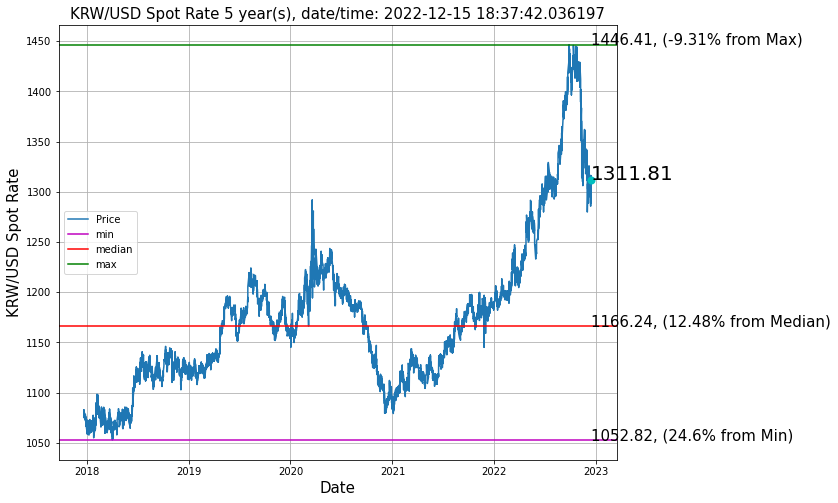

Lower Spot Rate, Cheaper USD in terms of vis-à-vis currency.
Dollar Invest Signal: False


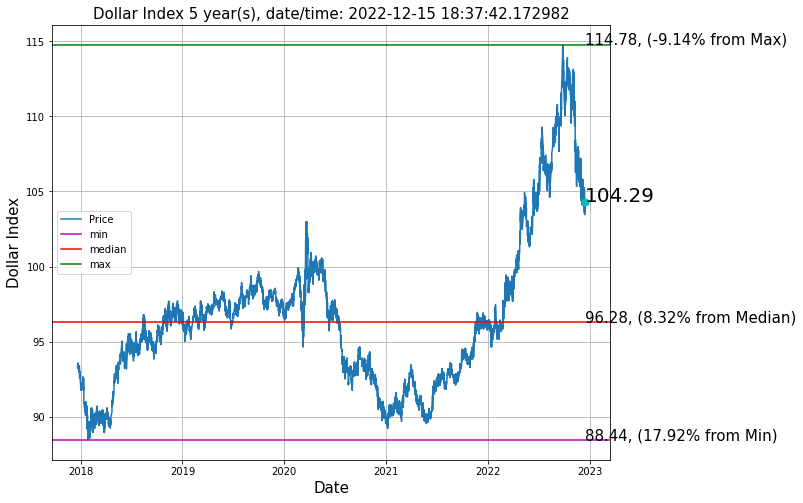

Lower Index, Cheaper USD in general, vis-à-vis a basket of currencies.
Dollar Invest Signal: False


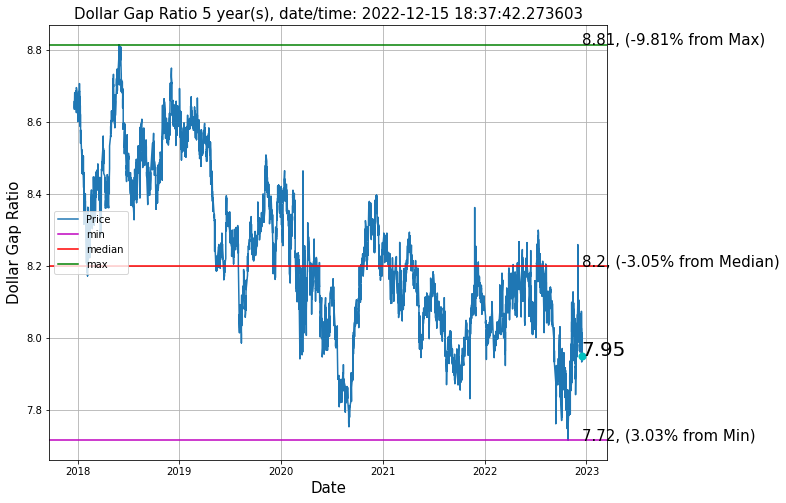

Higher Dollar Gap, Cheaper USD particularly for spot rate currency;
(Higher USD Index and Lower Spot Rate means USD is generally expensive
relative to basket of currencies but relatively cheap vis-à-vis the spot rate currency.) 
Dollar Invest Signal: False


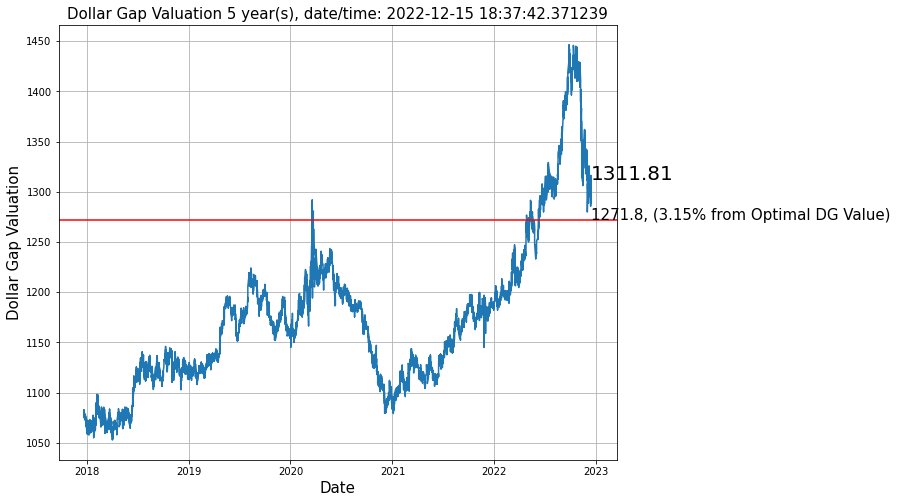

Current Spot Price lower than Valuation Price, Cheaper USD vis-à-vis spot rate currencies.
(in the latest {N} year(s)) 
Dollar Invest Signal: False
Wholistic Dollar Invest Signal: 0 %


In [6]:
fx_data = OHLC

Targetcurrency = 'KRW=X' #"SGD=X" 'KRW=X'
Targetcurrency_col = fx_data[Targetcurrency]

USDidx = 'DX-Y.NYB'
USDidx_col = fx_data[USDidx]

# Target Currency
targetcol = Targetcurrency_col
target_name = 'KRW/USD Spot Rate'
currentP,medianP = GraphAll(targetcol,target_name)
plt.show()
SpotSignal = currentP <= medianP
print('Lower Spot Rate, Cheaper USD in terms of vis-à-vis currency.\n'
      f'Dollar Invest Signal: {SpotSignal}')

# Dollar Index
targetcol = USDidx_col
target_name = 'Dollar Index'
currentP,medianP = GraphAll(targetcol,target_name)
plt.show()
IndexSignal = currentP <= medianP
print('Lower Index, Cheaper USD in general, vis-à-vis a basket of currencies.\n'
      f'Dollar Invest Signal: {IndexSignal}')

# Dollar Gap Ratio
DollarGap = (USDidx_col / Targetcurrency_col)*100
targetcol = DollarGap
target_name = 'Dollar Gap Ratio'
currentP,medianP = GraphAll(targetcol,target_name)
plt.show()
DGSignal = currentP >= medianP
print('Higher Dollar Gap, Cheaper USD particularly for spot rate currency;\n'
      '(Higher USD Index and Lower Spot Rate means USD is generally expensive\n'
      'relative to basket of currencies but relatively cheap vis-à-vis the spot rate currency.) \n'
      f'Dollar Invest Signal: {DGSignal}')

# Dollar Gap Currency Valuation
targetcol = DollarGap
target_name = 'Dollar Gap Valuation'
currentP,ValuationP = GraphAll(targetcol,target_name,Targetcurrency_col,USDidx_col)
plt.show()
ValueSignal = currentP <= ValuationP
print('Current Spot Price lower than Valuation Price, Cheaper USD vis-à-vis spot rate currencies.\n'
      '(in the latest {N} year(s)) \n'
      f'Dollar Invest Signal: {ValueSignal}')

TotalSignal = bool(SpotSignal) + bool(IndexSignal) + bool(DGSignal) + bool(ValueSignal)
print(f'Wholistic Dollar Invest Signal: {round((TotalSignal/4)*100)} %')